In [8]:
import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates



import numpy as np
import pandas as pd
import copy

from tslib.src import tsUtils
from tslib.src.synthcontrol.syntheticControl import RobustSyntheticControl
from tslib.tests import testdata

In [9]:


filename = r'C:\projects\RSC\tslib\tests\testdata\prop99.csv'


df = pd.read_csv(filename)
df = df[df['SubMeasureDesc'] == 'Cigarette Consumption (Pack Sales Per Capita)']
pivot = df.pivot_table(values='Data_Value', index='LocationDesc', columns=['Year'])
dfProp99 = pd.DataFrame(pivot.to_records())

allColumns = dfProp99.columns.values    

In [37]:
pd.set_option('display.max_columns', 10)
dfProp99.head()

,LocationDesc,1970,1971,1972,1973,...,2010,2011,2012,2013,2014
0,Alabama,89.8,95.4,101.1,102.9,...,71.5,68.4,67.2,64.6,61.7
1,Alaska,121.3,123.0,130.0,125.8,...,43.8,43.3,41.2,39.0,37.2
2,Arizona,115.2,109.6,125.0,128.3,...,24.8,27.1,25.0,24.4,23.0
3,Arkansas,100.3,104.1,103.9,108.0,...,63.2,61.1,60.5,57.5,54.4
4,California,123.0,121.0,123.5,124.4,...,26.3,26.0,25.2,23.9,22.7


In [11]:
states = list(np.unique(dfProp99['LocationDesc']))
years = np.delete(allColumns, [0])
caStateKey = 'California'
states.remove(caStateKey)
otherStates = states

yearStart = 1970
yearTrainEnd = 1989
yearTestEnd = 2015

p = 1.0

In [12]:
trainingYears = []
for i in range(yearStart, yearTrainEnd, 1):
 trainingYears.append(str(i))

testYears = []
for i in range(yearTrainEnd, yearTestEnd, 1):
 testYears.append(str(i))

trainDataMasterDict = {}
trainDataDict = {}
testDataDict = {}
for key in otherStates:
 series = dfProp99.loc[dfProp99['LocationDesc'] == key]

 trainDataMasterDict.update({key: series[trainingYears].values[0]})

 # randomly hide training data
 (trainData, pObservation) = tsUtils.randomlyHideValues(copy.deepcopy(trainDataMasterDict[key]), p)
 trainDataDict.update({key: trainData})
 testDataDict.update({key: series[testYears].values[0]})
series = dfProp99[dfProp99['LocationDesc'] == caStateKey]
trainDataMasterDict.update({caStateKey: series[trainingYears].values[0]})
trainDataDict.update({caStateKey: series[trainingYears].values[0]})
testDataDict.update({caStateKey: series[testYears].values[0]})

trainMasterDF = pd.DataFrame(data=trainDataMasterDict)
trainDF = pd.DataFrame(data=trainDataDict)
testDF = pd.DataFrame(data=testDataDict)


In [13]:
trainDF

,Alabama,Alaska,Arizona,Arkansas,Colorado,...,Washington,West Virginia,Wisconsin,Wyoming,California
0,89.8,121.3,115.2,100.3,124.8,...,96.7,114.5,106.4,132.2,123.0
1,95.4,123.0,109.6,104.1,125.5,...,97.0,111.5,105.4,131.7,121.0
2,101.1,130.0,125.0,103.9,134.3,...,88.5,117.5,108.8,140.0,123.5
3,102.9,125.8,128.3,108.0,137.9,...,91.0,116.6,109.5,141.2,124.4
4,108.2,130.4,133.1,109.7,132.8,...,98.6,119.9,111.8,145.8,126.7
5,111.7,150.4,121.8,114.8,131.0,...,99.5,123.2,113.5,160.7,127.1
6,116.2,164.8,122.3,119.1,134.2,...,100.3,129.7,115.4,161.5,128.0
7,117.1,159.3,121.7,122.6,132.0,...,99.3,133.9,117.2,160.4,126.4
8,123.0,143.6,124.7,127.3,129.2,...,101.3,131.6,116.7,160.3,126.1
9,121.4,138.1,124.6,126.5,131.5,...,101.4,122.1,117.1,168.6,121.9


In [14]:
testDF

,Alabama,Alaska,Arizona,Arkansas,Colorado,...,Washington,West Virginia,Wisconsin,Wyoming,California
0,105.6,94.4,96.8,118.3,88.8,...,86.1,104.0,100.3,111.4,82.4
1,108.6,100.2,88.9,113.1,87.4,...,83.4,104.1,94.1,96.9,77.8
2,107.9,101.8,81.2,116.8,90.2,...,78.7,100.1,95.5,109.1,68.7
3,109.1,98.5,79.0,126.0,88.3,...,81.1,98.0,96.2,110.8,67.5
4,108.5,95.2,80.3,113.8,88.6,...,79.4,111.0,91.2,108.4,63.4
5,107.1,94.1,79.0,108.8,89.1,...,72.6,104.2,91.8,111.2,58.6
6,102.6,89.5,77.3,113.0,85.4,...,67.4,115.8,93.5,115.0,56.4
7,101.4,89.9,71.4,110.7,83.1,...,58.1,112.7,92.1,110.3,54.5
8,104.9,81.7,64.6,108.7,81.3,...,55.6,114.5,91.9,108.8,53.8
9,106.2,78.6,66.0,109.5,81.2,...,56.4,114.6,88.7,102.9,52.3


[3.17551252e+02 2.21986832e+02 7.94061839e+01 4.91869055e+01
 4.10161552e+01 3.44008134e+01 2.64093759e+01 2.46998324e+01
 2.13640545e+01 1.82553452e+01 1.62620936e+01 1.51667414e+01
 1.40135592e+01 1.22757813e+01 1.06593861e+01 9.71411744e+00
 8.38429179e+00 6.88276205e+00 4.35659654e-13]
-------------
19


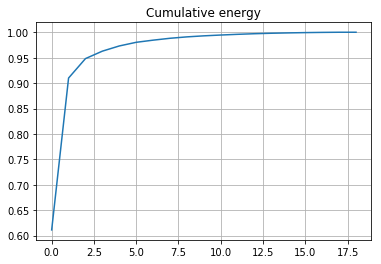

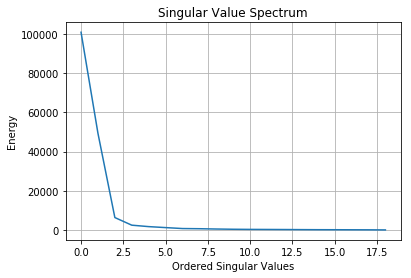

In [36]:
(U, s, Vh) = np.linalg.svd((trainDF) - np.mean(trainDF))
s2 = np.power(s, 2)
spectrum = np.cumsum(s2)/np.sum(s2)

plt.plot(spectrum)
plt.grid()
plt.title("Cumulative energy")
plt.figure()
plt.plot(s2)
plt.grid()


plt.xlabel("Ordered Singular Values") 
plt.ylabel("Energy")


plt.title("Singular Value Spectrum")


In [16]:
singvals = 4
rscModel = RobustSyntheticControl(caStateKey, singvals, len(trainDF), probObservation=1.0, modelType='svd', svdMethod='numpy', otherSeriesKeysArray=otherStates)
rscModel.fit(trainDF)
denoisedDF = rscModel.model.denoisedDF()

In [31]:
predictions = []
predictions = np.dot(testDF[otherStates], rscModel.model.weights)
actual = dfProp99.loc[dfProp99['LocationDesc'] == caStateKey]
actual = actual.drop('LocationDesc', axis=1)
actual = actual.iloc[0]
model_fit = np.dot(trainDF[otherStates][:], rscModel.model.weights)

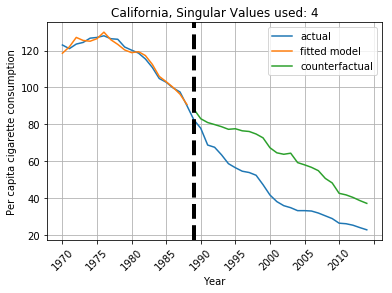

In [13]:
fig, ax = plt.subplots(1,1)
tick_spacing = 5
# this is a bug in matplotlib
label_markings = np.insert(years[::tick_spacing], 0, 'dummy')

ax.set_xticks(np.arange(len(label_markings)))
ax.set_xticklabels(label_markings, rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.plot(years, actual ,label='actual')
plt.xlabel('Year')
plt.ylabel('Per capita cigarette consumption')
plt.plot(trainingYears, model_fit, label='fitted model')
plt.plot(testYears, predictions, label='counterfactual')
plt.title(caStateKey+', Singular Values used: '+str(singvals))

xposition = pd.to_datetime(yearTrainEnd,  errors='coerce')
plt.axvline(x=str(yearTrainEnd), color='k', linestyle='--', linewidth=4)
plt.grid()
plt.legend()